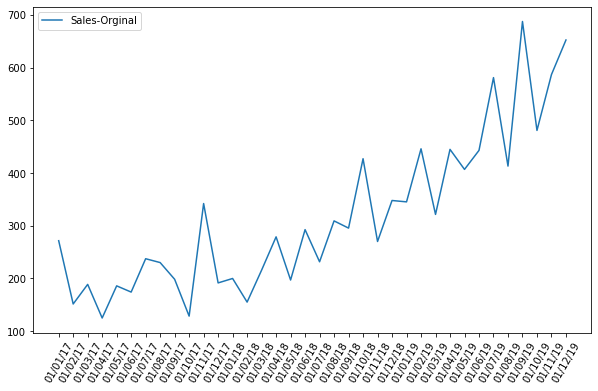

In [3]:
## moving averages

# import needful libs
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# read dataset
sales_data = pd.read_csv('sales.csv')

# setting figure size
plt.figure(figsize=(10,6))

# plot orginal sales data
plt.plot(sales_data['Time'], sales_data['Sales'], 
         label = "Sales-Orginal")

# rotate xlabels
plt.xticks(rotation=60)

# add legends
plt.legend()

# display the plot
plt.show()

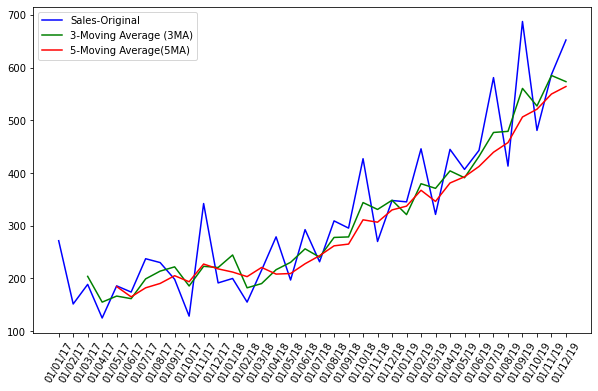

In [4]:
# moving average with window 3
sales_data['3MA'] = sales_data['Sales'].rolling(window=3).mean()

# moving average with window 5
sales_data['5MA'] = sales_data['Sales'].rolling(window=5).mean()

# setting figure size
plt.figure(figsize=(10,6))

# plot orginal sales data
plt.plot(sales_data['Time'], sales_data['Sales'], 
        label="Sales-Original", color="blue")

# plot 3-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], 
         label="3-Moving Average (3MA)", color="green")

# plot 5-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], 
        label="5-Moving Average(5MA)", color="red")

# rotate xlabels
plt.xticks(rotation=60)

# add legends
plt.legend()

# display the plot
plt.show()

<AxesSubplot:xlabel='Time'>

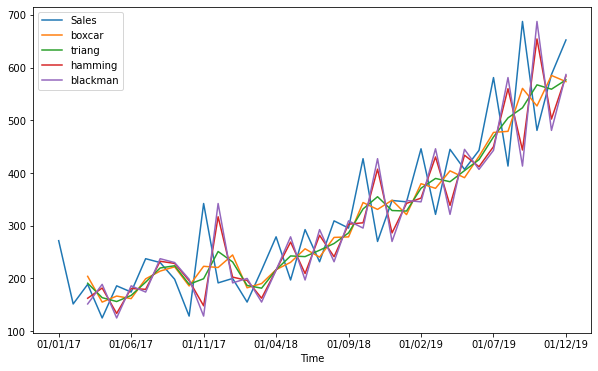

In [6]:
# window functions

# import needful libraries - loaded in first command
#import pandas as pd
#import statsmodels.api as sm
#import matplotlib.pyplot as plt

# read dataset
sales_data = pd.read_csv('sales.csv', index_col="Time")

# apply all the windows on given DataFrame
sales_data['boxcar'] = sales_data.Sales.rolling(3, win_type='boxcar').mean()
sales_data['triang'] = sales_data.Sales.rolling(3, win_type='triang').mean()
sales_data['hamming'] = sales_data.Sales.rolling(3, win_type='hamming').mean()
sales_data['blackman'] = sales_data.Sales.rolling(3, win_type='blackman').mean()

# plot the rolling mean of all the windows
sales_data.plot(kind='line', figsize=(10,6))

In [7]:
# defining cointegration

# import required libs
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import numpy as np

# calculate ADF function
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()
    return ts.adfuller(result.resid)

# read the Dataset
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)


In [9]:
# create Sine wave and apply ADF test
t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

Self ADF (3.956319476495162e-16, 0.958532086060056, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -21598.896016765088)


In [10]:
# apply ADF test on Sine and Sine with noise
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

ADF sine with noise (-17.62552157029604, 3.8203908287165654e-30, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1855.506811043978)


In [11]:
# apply ADF test on Sine and Cosine with noise
cosine = 100 * np.cos(t) + 10

print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

ADF sine vs cosine with noise (-6.374451613018041, 2.302155686948863e-08, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -10037.933932666414)


In [12]:
print("Sine vs sunspots", calc_adf(sine, data))

Sine vs sunspots (-6.7242691810701, 3.4210811915549524e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


In [ ]:
# STL decomposition - next time!